In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import encodings_solution_1, encodings_solution_2

In this notebook, you'll be working with the Pokémon dataset from the univariate plots lesson.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [3]:
# YOUR CODE HERE

In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
id                 807 non-null int64
species            807 non-null object
generation_id      807 non-null int64
height             807 non-null float64
weight             807 non-null float64
base_experience    807 non-null int64
type_1             807 non-null object
type_2             405 non-null object
hp                 807 non-null int64
attack             807 non-null int64
defense            807 non-null int64
speed              807 non-null int64
special-attack     807 non-null int64
special-defense    807 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 88.3+ KB


In [5]:
desc = pokemon[["defense","special-defense","speed"]].describe()
desc

,defense,special-defense,speed
count,807.000000,807.000000,807.000000
mean,71.726146,70.013631,65.830235
std,29.730228,27.292344,27.736838
min,5.000000,20.000000,5.000000
25%,50.000000,50.000000,45.000000
50%,67.000000,65.000000,65.000000
75%,89.000000,85.000000,85.000000
max,230.000000,230.000000,160.000000


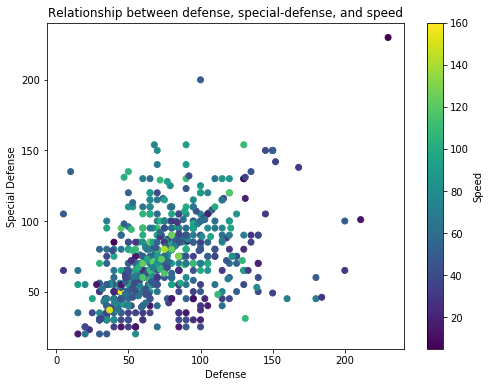

In [6]:
plt.figure(figsize=[8,6])
plt.scatter(data=pokemon,x="defense",y="special-defense", c="speed")

plt.xlabel("Defense")
plt.ylabel("Special Defense")

plt.colorbar(label="Speed") # Set the legend color bar (at the right)

plt.title("Relationship between defense, special-defense, and speed");

It can be observed from the above plot two things :
* On the x-axis, we have a lot of data in \[0;160[
* On the y-axis, we have a lot of data in \[0;150[

The summary statistics (describe) shows that the min of defense is 5, while the min of special-defense is 20.              
Based on those observations, we will redo the plot while zoom-in in our data.

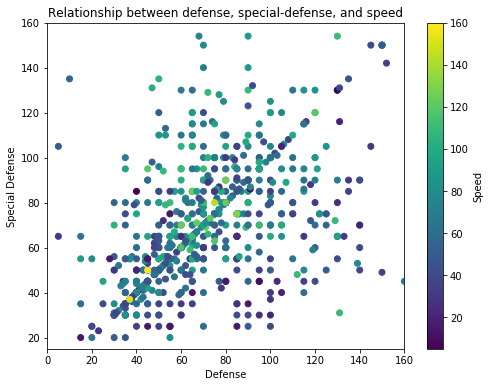

In [7]:
plt.figure(figsize=[8,6])
plt.scatter(data=pokemon,x="defense",y="special-defense", c="speed")

plt.xlabel("Defense")
plt.ylabel("Special Defense")

plt.xlim(0,160)
plt.ylim(15,160)

plt.colorbar(label="Speed") # Set the legend color bar (at the right)

plt.title("Relationship between defense, special-defense, and speed");

When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.


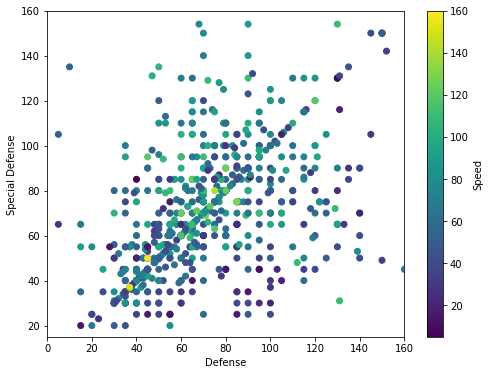

In [8]:
# run this cell to check your work against ours
encodings_solution_1()

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [9]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols) # Retrieve all columns except those in type_cols
non_type_cols

Index(['attack', 'base_experience', 'defense', 'generation_id', 'height', 'hp',
       'id', 'special-attack', 'special-defense', 'species', 'speed',
       'weight'],
      dtype='object')

In [10]:
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code.              
**Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [11]:
# YOUR CODE HERE

In [12]:
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
pokemon_sub.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon


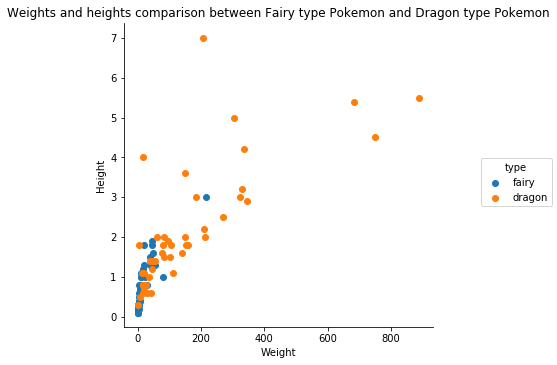

In [13]:
# plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, 'weight','height')
g.add_legend()

plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weights and heights comparison between Fairy type Pokemon and Dragon type Pokemon");

This plot doesn't allow us to make a detailed observation. So let us first try to zoom-in in order to improve the gained informations.

In [14]:
desc2= pokemon_sub[ ["weight","height"] ].describe()
desc2

,weight,height
count,92.000000,92.000000
mean,86.643478,1.439130
std,154.770876,1.338849
min,0.100000,0.100000
25%,6.600000,0.600000
50%,22.350000,1.100000
75%,87.500000,1.800000
max,888.000000,7.000000


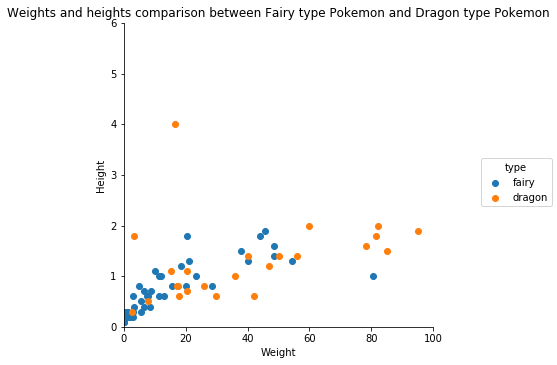

In [15]:
# plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, 'weight','height')
g.add_legend()

plt.xlim(0,100)
plt.ylim(0,6)

plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weights and heights comparison between Fairy type Pokemon and Dragon type Pokemon");

This plot is good enough to get some insights, but let us tweak it again a little bit in order to better compare weight and height between dragon and fairy types.

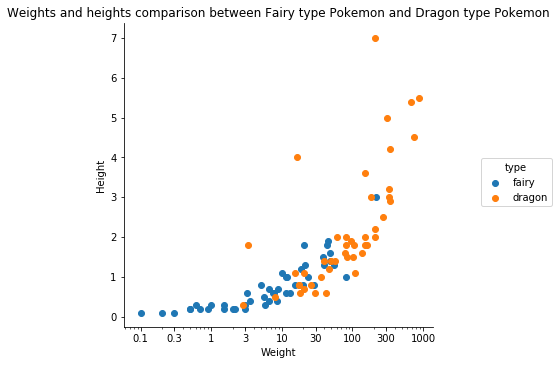

In [16]:
# plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, 'weight','height')
g.add_legend()

# plt.xlim(0,100)
# plt.ylim(0,6)
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)

plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weights and heights comparison between Fairy type Pokemon and Dragon type Pokemon");

This plot allow us a clearer comparison between fairy and dradon types height and weight.

After subsetting the data, I used FacetGrid to set up and generate the plot. I used the .set() method for FacetGrid objects to set the x-scaling and tick marks. The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.


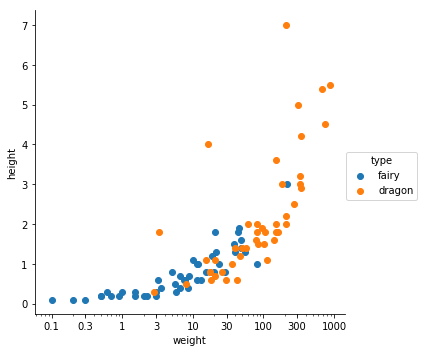

In [17]:
# run this cell to check your work against ours
encodings_solution_2()